# $\text{FDBM}(H=0.7)$ on Moons

### Training

In [1]:
%load_ext autoreload

%autoreload 2

import warnings
# Suppress non-critical warnings (including verbose local file paths). Uncomment to display warnings.
warnings.filterwarnings("ignore")

import os
os.chdir("..")

from toy.experiment import *

Experiment.run(f"--method=fdbm --dataset=moon --h_dim=64  --n_layers=2  --n_epochs=20  --timestep_emb_dim=32  --in_dim=4 --out_dim=2 --max_diffusivity=0.6  --H=0.7  --K=5 --norm=True --activation=silu").save("moon_vis_fdbm")

args: ['--method=fdbm', '--dataset=moon', '--h_dim=64', '--n_layers=2', '--n_epochs=20', '--timestep_emb_dim=32', '--in_dim=4', '--out_dim=2', '--max_diffusivity=0.6', '--H=0.7', '--K=5', '--norm=True', '--activation=silu']
config: {'data_dir': 'moon', 'log_dir': 'toy/reproducibility/moon/model', 'config': None, 'task': 'synthetic', 'method': 'fdbm', 'wandb_entity': None, 'group_name': None, 'wandb_mode': 'online', 'job_type': 'dev-train', 'online': False, 'dataset': 'moon', 'n_samples': 10000, 'train_bs': 32, 'val_bs': 8, 'transform': None, 'split_fracs': [0.8, 0.1, 0.1], 'num_workers': 0, 'in_dim': 4, 'out_dim': 2, 'timestep_emb_dim': 32, 'h_dim': 64, 'n_layers': 2, 'activation': 'silu', 'dropout_p': 0.1, 'run_name': 'cwopheqco', 'n_epochs': 20, 'fine_tune_last_n_epochs': 100, 'use_grad_noise': False, 'drift_weight': 1.0, 'reg_weight': 1.0, 'reg_weight_T': 1.0, 'reg_weight_t': 1.0, 'max_diffusivity': 0.6, 'H': 0.7, 'K': 5, 'norm': True, 'use_drift_in_doobs': False, 'optim_name': 'ada

### Evaluation

Initialized sde_drift with 31618 parameters


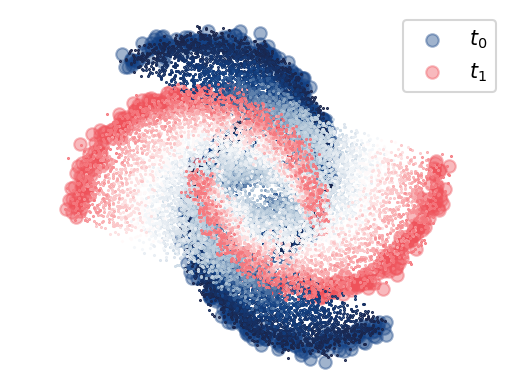

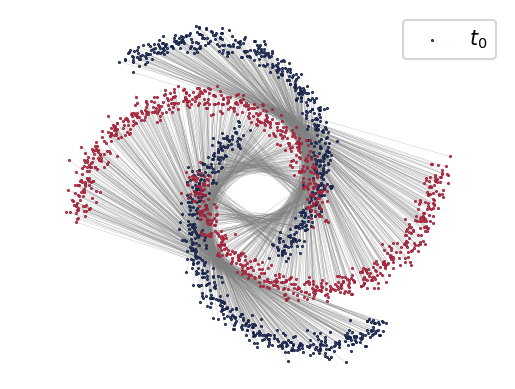

In [2]:
moon = Experiment.load("moon_vis_fdbm")

plt.axis("off")
plt.axis("equal")
plot_marginals(moon.get_marginals())
samples = moon.sample(samples_num=1000, trials_num=1)[:,:,:,0]
plot_multiple_marginals(samples, skip_step=4) 
plt.show()
plt.close()

plt.axis("off")
plt.axis("equal")

plot_matchings(*samples[[0,-1]])
plot_multiple_marginals(samples, skip_step=99, labels=[r"$t_0$", r"$t_1$"], alpha=1)
plt.show()
plt.close()

# $\text{FDBM}(H=0.2)$ on T-shaped

### Training

In [3]:
Experiment.run(f"--method fdbm --dataset=diagonal_matching_inverse  --h_dim=32  --n_layers=3  --n_epochs=20 --timestep_emb_dim=32 --in_dim=4 --max_diffusivity=0.1 --H=0.2 --K=5 --norm=True --activation=selu").save("tshaped_vis_fdbm")

args: ['--method', 'fdbm', '--dataset=diagonal_matching_inverse', '--h_dim=32', '--n_layers=3', '--n_epochs=20', '--timestep_emb_dim=32', '--in_dim=4', '--max_diffusivity=0.1', '--H=0.2', '--K=5', '--norm=True', '--activation=selu']
config: {'data_dir': 'diagonal_matching_inverse', 'log_dir': 'toy/reproducibility/diagonal_matching_inverse/model', 'config': None, 'task': 'synthetic', 'method': 'fdbm', 'wandb_entity': None, 'group_name': None, 'wandb_mode': 'online', 'job_type': 'dev-train', 'online': False, 'dataset': 'diagonal_matching_inverse', 'n_samples': 10000, 'train_bs': 32, 'val_bs': 8, 'transform': None, 'split_fracs': [0.8, 0.1, 0.1], 'num_workers': 0, 'in_dim': 4, 'out_dim': 2, 'timestep_emb_dim': 32, 'h_dim': 32, 'n_layers': 3, 'activation': 'selu', 'dropout_p': 0.1, 'run_name': 'uodqzaqsz', 'n_epochs': 20, 'fine_tune_last_n_epochs': 100, 'use_grad_noise': False, 'drift_weight': 1.0, 'reg_weight': 1.0, 'reg_weight_T': 1.0, 'reg_weight_t': 1.0, 'max_diffusivity': 0.1, 'H': 0.

Initialized sde_drift with 10754 parameters
Model with 0.010754M parameters

Saved model config to toy/reproducibility/diagonal_matching_inverse/model/uodqzaqsz/config_train.yml

Training model for 20 epochs...
Epoch 1: Training Loss: 2903.8939 
Epoch 1: Validation Loss: 29.6009 

After best validation, saving model to toy/reproducibility/diagonal_matching_inverse/model/uodqzaqsz/best_model.pt
After best validation, saving ema to toy/reproducibility/diagonal_matching_inverse/model/uodqzaqsz/best_ema_model.pt

Saving last model to toy/reproducibility/diagonal_matching_inverse/model/uodqzaqsz/last_model.pt

Epoch 2: Training Loss: 280.5876 
Epoch 2: Validation Loss: 11.2943 

After best validation, saving model to toy/reproducibility/diagonal_matching_inverse/model/uodqzaqsz/best_model.pt
After best validation, saving ema to toy/reproducibility/diagonal_matching_inverse/model/uodqzaqsz/best_ema_model.pt

Saving last model to toy/reproducibility/diagonal_matching_inverse/model/uodqzaqsz/l

### Inference

Initialized sde_drift with 10754 parameters


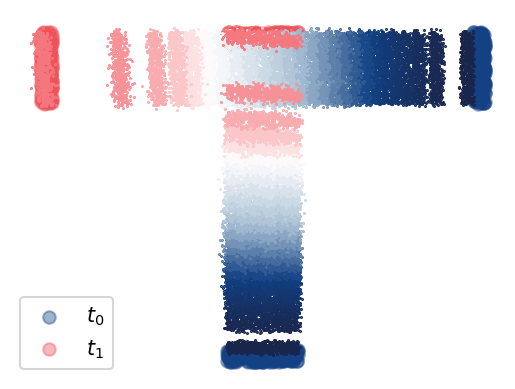

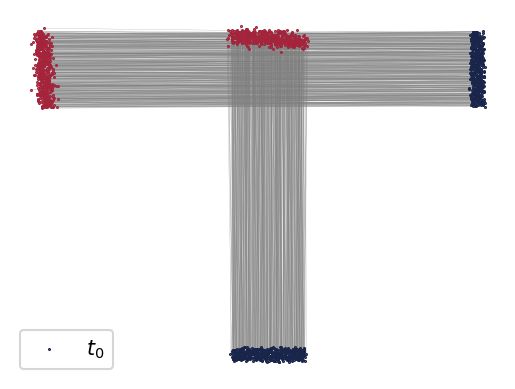

In [4]:
tshape = Experiment.load("tshaped_vis_fdbm")

plt.axis("off")
plt.axis("equal")
plot_marginals(tshape.get_marginals())
samples = tshape.sample(samples_num=1000, trials_num=1)[:,:,:,0]
plot_multiple_marginals(samples, skip_step=4) 
plt.show()
plt.close()

plt.axis("off")
plt.axis("equal")

plot_matchings(*samples[[0,-1]])
plot_multiple_marginals(samples, skip_step=100, labels=[r"$t_0$", r"$t_1$"], alpha=1)
plt.show()
plt.close()